# EXPLORATORY DATA ANALYSIS NOTEBOOK

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_file(path):
    return pd.read_csv(path)
train = read_file(path='train.csv')
test = read_file(path='test.csv')

## DATA QAULITY CHECKS

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
#Check the percentage of missing values in each column
train.isna().sum()/train.shape[0]

country                   0.0
year                      0.0
uniqueid                  0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64

In [9]:
#Are there duplicates in the training set?
train.drop_duplicates().shape == train.shape

True

- There are no missng values in any of the columns in the training dataset.
- There are no duplicated entries in the training dataset. As an attempt to drop the duplicated entries resulted in the initial training set.

## UNI-VARIATE ANALYSIS

In [58]:
def uni_analyze(column):
    print(train[column].value_counts())
    pal = sns.color_palette("Greens_d", len(train[column].unique()))
    counts= train[column].value_counts().values
    hue_order = counts.argsort()
    if len(train[column].unique()) > 4:
        sns.barplot(y=train[column].unique(), x=counts, palette=np.array(pal[:])[hue_order]).set(title=f'frequency distribution of {column} variable')
    else:
        sns.barplot(x=train[column].unique(), y=counts, palette=np.array(pal[:])[hue_order]).set(title=f'frequency distribution of {column} variable')


Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64


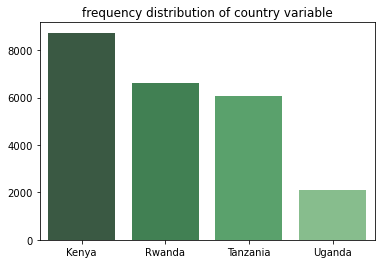

In [59]:
uni_analyze(column='country')

No     20212
Yes     3312
Name: bank_account, dtype: int64


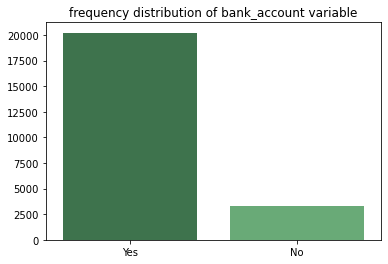

In [60]:
uni_analyze(column='bank_account')

Rural    14343
Urban     9181
Name: location_type, dtype: int64


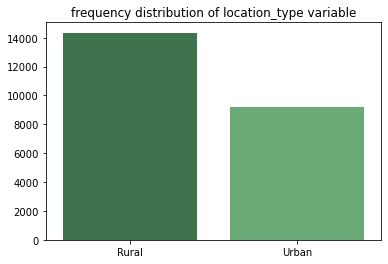

In [61]:
uni_analyze(column='location_type')

Yes    17454
No      6070
Name: cellphone_access, dtype: int64


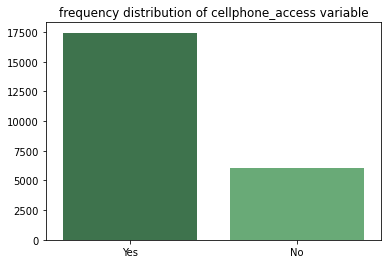

In [62]:
uni_analyze(column='cellphone_access')

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64


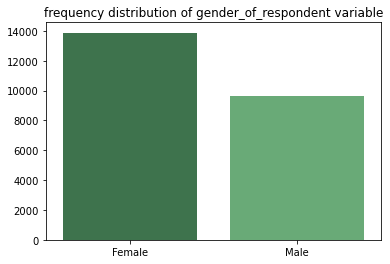

In [63]:
uni_analyze(column='gender_of_respondent')

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64


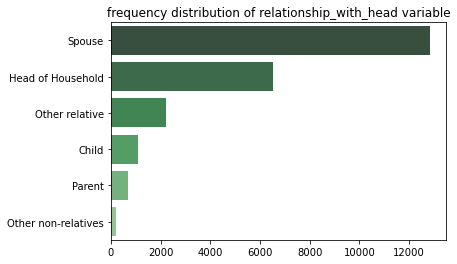

In [64]:
uni_analyze(column='relationship_with_head')

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64


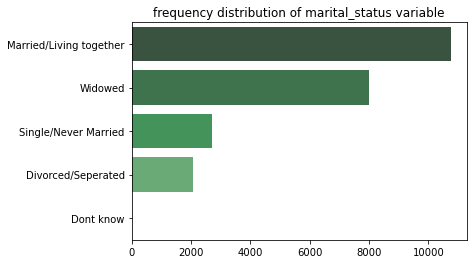

In [65]:
uni_analyze(column='marital_status')

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64


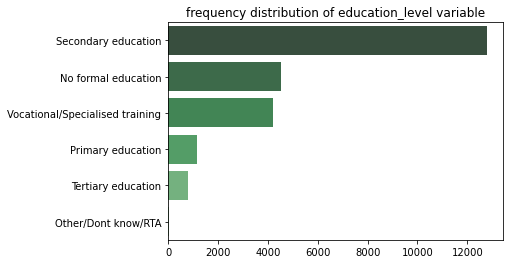

In [66]:
uni_analyze(column='education_level')

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64


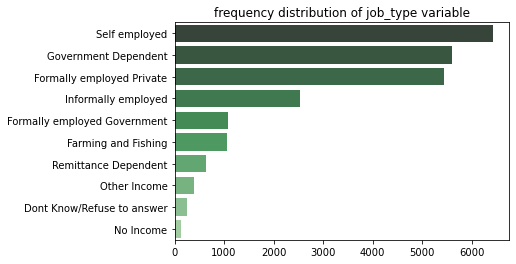

In [67]:
uni_analyze(column='job_type')

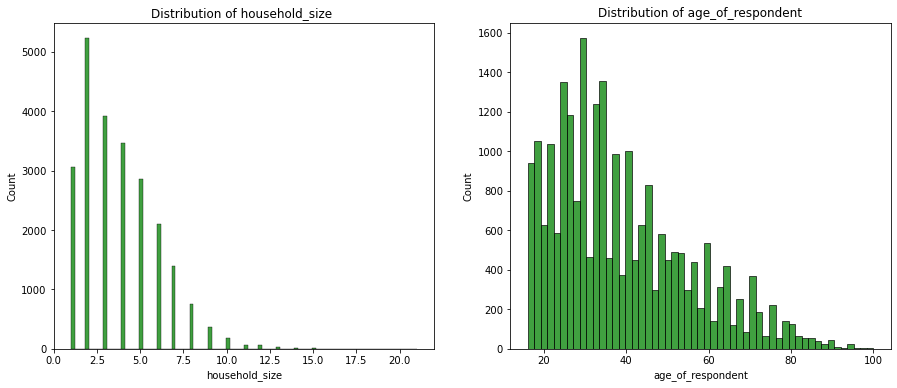

In [72]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
ax1 = sns.histplot(train, x="household_size",ax=axes[0],color='g')
ax1.title.set_text("Distribution of household_size ")

ax2 = sns.histplot(train, x="age_of_respondent",ax=axes[1],color='g')
ax2.title.set_text("Distribution of age_of_respondent")


## BI-VARIATE ANALYSIS

In [73]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

### Analysis of education_level and bank_account variables

In [89]:
#group data by MaritalStatus and bank_account variables.
print(train.groupby(['education_level','bank_account',])['bank_account'].count())

education_level                  bank_account
No formal education              No               4339
                                 Yes               176
Other/Dont know/RTA              No                 24
                                 Yes                11
Primary education                No              11698
                                 Yes              1093
Secondary education              No               3240
                                 Yes               983
Tertiary education               No                566
                                 Yes               591
Vocational/Specialised training  No                345
                                 Yes               458
Name: bank_account, dtype: int64


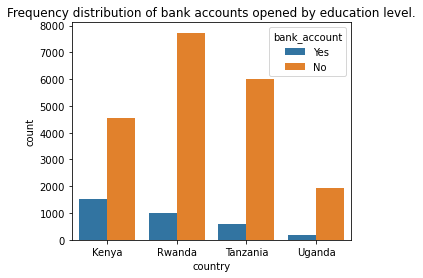

In [90]:
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="country", hue="bank_account", data=train)
plt.title("Frequency distribution of bank accounts opened by education level.")
plt.show()

### Analysis of country and bank_account variables

Percentage distribution of bank_accounts created with respect to countries:

country   bank_account
Kenya     No              74.934080
          Yes             25.065920
Rwanda    No              88.517459
          Yes             11.482541
Tanzania  No              90.830816
          Yes              9.169184
Uganda    No              91.385055
          Yes              8.614945
dtype: float64


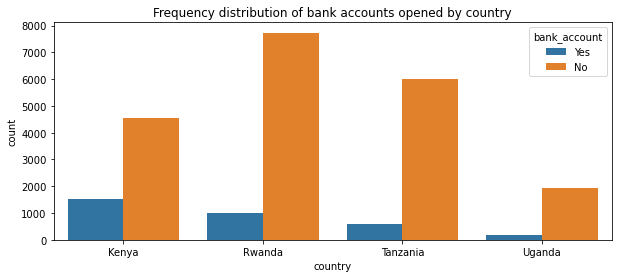

In [94]:
print("Percentage distribution of bank_accounts created with respect to countries:\n")
print((train.groupby(['country','bank_account'])['bank_account'].count()/\
     train.groupby(['country'])['country'].count() ) *100)
f, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(x="country", hue="bank_account", data=train)
plt.title("Frequency distribution of bank accounts opened by country")
plt.show()

### Analysis of year and bank_account variables

Percentage distribution of bank_accounts created with respect to countries:

year  bank_account
2016  No              7732
      Yes             1003
2017  No              6013
      Yes              607
2018  No              6467
      Yes             1702
Name: bank_account, dtype: int64


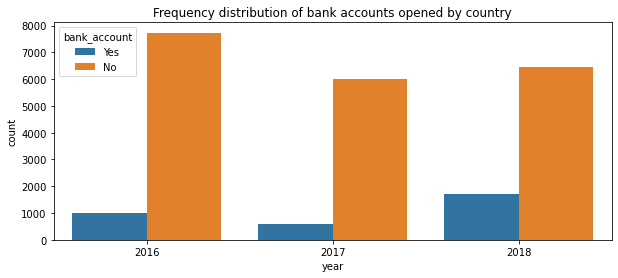

In [95]:
print("Percentage distribution of bank_accounts created with respect to countries:\n")
print(train.groupby(['year','bank_account'])['bank_account'].count())
f, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(x="year", hue="bank_account", data=train)
plt.title("Frequency distribution of bank accounts opened by country")
plt.show()

## MULTI-VARIATE ANALYSIS

In [86]:
#correlation heatmap plot
print("Correlation Matrix:\n")
corr = train.corr()
corr

Correlation Matrix:



,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


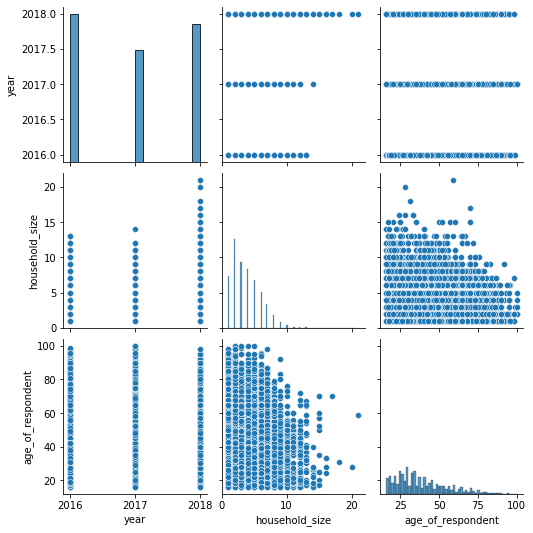

In [91]:
sns.pairplot(train)